In [12]:
#ingest data
import pandas as pd

#For Evaluating the model
from sklearn.metrics import mean_absolute_error, mean_squared_error

#Algorithm used - LinearRegression
from sklearn.linear_model import LinearRegression

#To convert million , billion string into float
import re

#For plotting
import matplotlib.pyplot as plt

from sklearn.feature_extraction import DictVectorizer

import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
# Load the data
data = pd.read_csv('/workspaces/MLOps_Zoomcamp_Project_YoutubePrediction/dataset/youtube.csv')

# Check for NaN values in the DataFrame
print("NaNs before dropping rows:")
print(data.isnull().sum())

# Drop rows with NaN values
data.dropna(inplace=True)

# Verify NaNs after dropping rows (should be 0 if all NaN rows were dropped)
print("\nNaNs after dropping rows:")
print(data.isnull().sum())

NaNs before dropping rows:
RANK                      0
NAME_OF_CHANNEL           7
TOTAL_NUMBER_OF_VIDEOS    0
SUBSCRIBERS               0
VIEWS                     0
CATEGORY                  8
dtype: int64

NaNs after dropping rows:
RANK                      0
NAME_OF_CHANNEL           0
TOTAL_NUMBER_OF_VIDEOS    0
SUBSCRIBERS               0
VIEWS                     0
CATEGORY                  0
dtype: int64


In [14]:
# Clean numeric columns
def clean_numeric_column(column):
    cleaned_column = []
    for value in column:
        if isinstance(value, str):
            if 'K' in value:
                cleaned_column.append(float(re.sub(r'[^0-9.]', '', value)) * 1000)
            elif 'M' in value:
                cleaned_column.append(float(re.sub(r'[^0-9.]', '', value)) * 1000000)
            elif 'B' in value:
                cleaned_column.append(float(re.sub(r'[^0-9.]', '', value)) * 1000000000)
            else:
                cleaned_column.append(float(re.sub(r'[^0-9.]', '', value)))
        else:
            cleaned_column.append(value)
    return cleaned_column

data['VIEWS'] = clean_numeric_column(data['VIEWS'])
data['TOTAL_NUMBER_OF_VIDEOS'] = clean_numeric_column(data['TOTAL_NUMBER_OF_VIDEOS'])
data['SUBSCRIBERS'] = clean_numeric_column(data['SUBSCRIBERS'])

In [15]:
data

,RANK,NAME_OF_CHANNEL,TOTAL_NUMBER_OF_VIDEOS,SUBSCRIBERS,VIEWS,CATEGORY
0,#1,MrBeast,799.0,274000000.0,5.098000e+10,Entertainment
1,#2,T-Series,21120.0,267000000.0,2.571600e+11,Music
2,#3,Cocomelon - Nursery Rhymes,1180.0,176000000.0,1.828800e+11,Kids
3,#4,SET India,138970.0,173000000.0,1.647100e+11,Entertainment
4,#5,✿ Kids Diana Show,1220.0,123000000.0,1.035000e+11,Kids
...,...,...,...,...,...,...
491,#492,SUPER SLICK SLIME SAM,1180.0,20600000.0,8.280000e+09,Education
492,#493,Clash of Clans,868.0,20600000.0,4.550000e+09,Kids
494,#495,What's Idea,205.0,20600000.0,1.910000e+09,DIY
495,#496,Smile Family Spanish,563.0,20500000.0,7.630000e+09,Entertainment


In [16]:
# Define features and target
numeric_features = ['VIEWS', 'TOTAL_NUMBER_OF_VIDEOS']
categorical_features = ['CATEGORY']



# Prepare data for training
train_dicts = data[categorical_features + numeric_features].to_dict(orient='records')

# Initialize DictVectorizer
dv = DictVectorizer()

# Transform categorical features into numerical representation
X_train = dv.fit_transform(train_dicts)
print("X_train shape:", X_train.shape)

# Extract target variable
y_train = data['SUBSCRIBERS'].values
print("y_train shape:", y_train.shape)

# Initialize Linear Regression model
lr = LinearRegression()

# Train the model
lr.fit(X_train, y_train)

# Predict on the training set
y_pred = lr.predict(X_train)

X_train shape: (485, 34)
y_train shape: (485,)


In [17]:
# Evaluate the model

mse = mean_squared_error(y_train, y_pred, squared=False)
print(f'MSE: {mse}')

MSE: 14801134.038355662


/opt/conda/envs/exp-tracking-env/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


/tmp/ipykernel_38624/437147669.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='prediction')
/tmp/ipykernel_38624/437147669.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, label='actual')


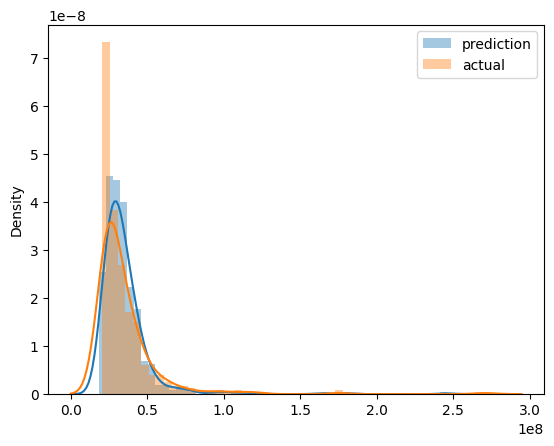

In [18]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()
